In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

train = pd.read_csv('../input/nlp-getting-started/train.csv')
test = pd.read_csv('../input/nlp-getting-started/test.csv')

In [2]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


1. id - a unique identifier for each tweet => 걍 ID
2. keyword - a particular keyword from the tweet (may be blank) => 뉴수 키워드
3. location - the location the tweet was sent from (may be blank) => 뉴스 발송지
4. text - the text of the tweet => 뉴스 내용
5. target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0) => 가짜 뉴스 여부

In [3]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [6]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [7]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

- keyword location text가 object 타입이므로 String 타입으로 써야할 수 있다.
- keyword와 location에 null 값이 많으므로 처리해야할 수 있다.
- text와 keyword만 비교할만하다.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


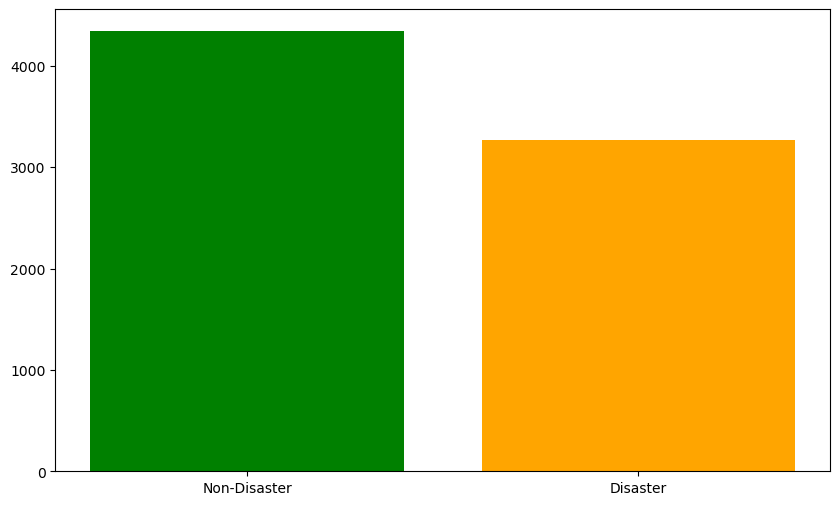

In [8]:
# EDA

import matplotlib.pyplot as plt
import seaborn as sns

news_class = train['target'].value_counts()
labels = ['Non-Disaster', 'Disaster']

fig, ax = plt.subplots(figsize = (10, 6))
ax.bar(labels, news_class, color = ['green', 'orange'])
fig.show()

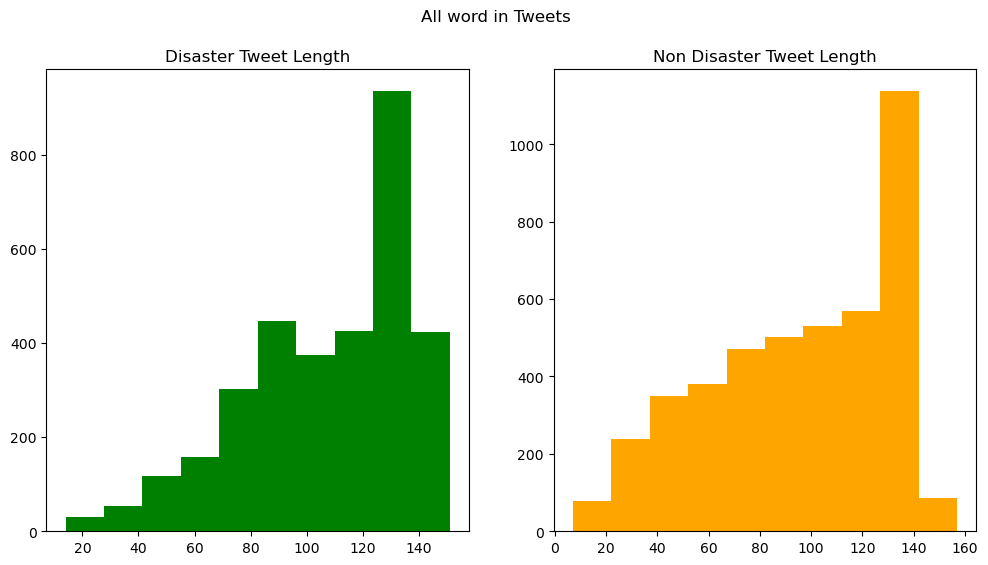

In [9]:
disaster_tweet_len = train[train['target'] == 1]['text'].str.len()
non_disaster_tweet_len = train[train['target'] == 0]['text'].str.len()

fig, ax = plt.subplots(1, 2, figsize = (12, 6))
ax[0].hist(disaster_tweet_len, color = 'green')
ax[0].set_title('Disaster Tweet Length')

ax[1].hist(non_disaster_tweet_len, color = 'orange')
ax[1].set_title('Non Disaster Tweet Length')

fig.suptitle('All word in Tweets')
plt.show()

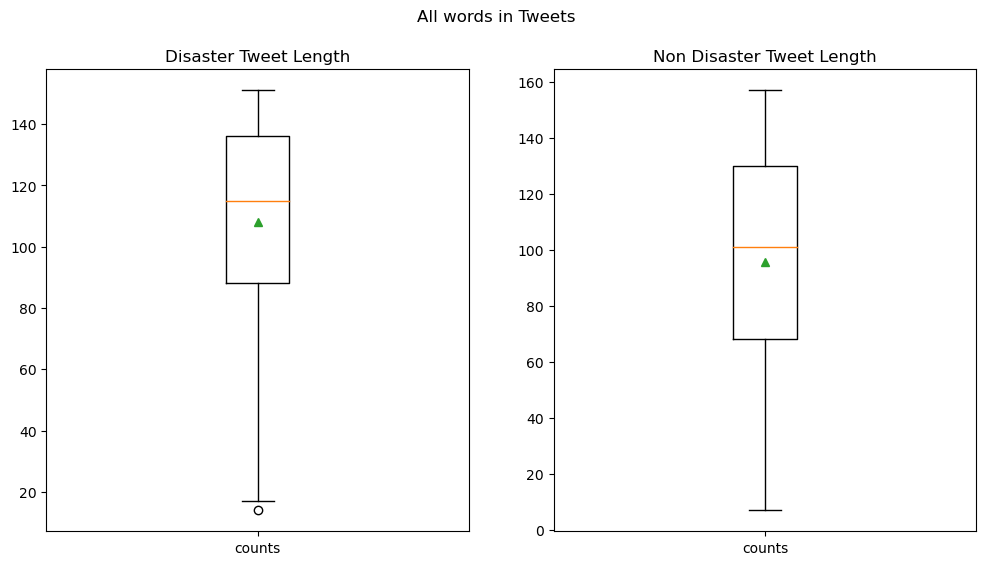

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
ax[0].boxplot(disaster_tweet_len, labels = ['counts'], showmeans = True)
ax[0].set_title('Disaster Tweet Length')
ax[1].boxplot(non_disaster_tweet_len, labels = ['counts'], showmeans = True)
ax[1].set_title('Non Disaster Tweet Length')
fig.suptitle('All words in Tweets')
plt.show()

- 가짜 뉴스가 더 많으며, 가짜 뉴스의 길이가 상대적으로 짧다.

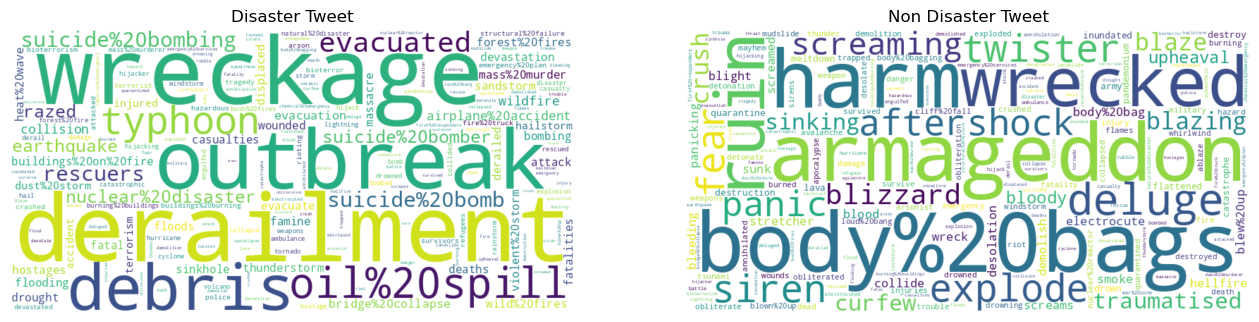

In [11]:
#워드크라우드 : 주로 사용된 데이터의 빈도수를 확인

from wordcloud import WordCloud, STOPWORDS

disaster_tweet_keywords = dict(train[train['target'] == 1]['keyword'].value_counts())
non_disaster_tweet_keywords = dict(train[train['target'] == 0]['keyword'].value_counts())

stopwords = set(STOPWORDS)
disaster_wordcloud = WordCloud(stopwords = stopwords, width = 800, height = 400, background_color = 'white').generate_from_frequencies(disaster_tweet_keywords)
non_disaster_wordcloud = WordCloud(stopwords = stopwords, width = 800, height = 400, background_color = 'white').generate_from_frequencies(non_disaster_tweet_keywords)

fig, ax = plt.subplots(1, 2, figsize = (16, 10))
ax[0].imshow(disaster_wordcloud, interpolation = 'bilinear')
ax[0].axis('off')
ax[0].set_title('Disaster Tweet')
ax[1].imshow(non_disaster_wordcloud, interpolation = 'bilinear')
ax[1].axis('off')
ax[1].set_title('Non Disaster Tweet')
fig.show()

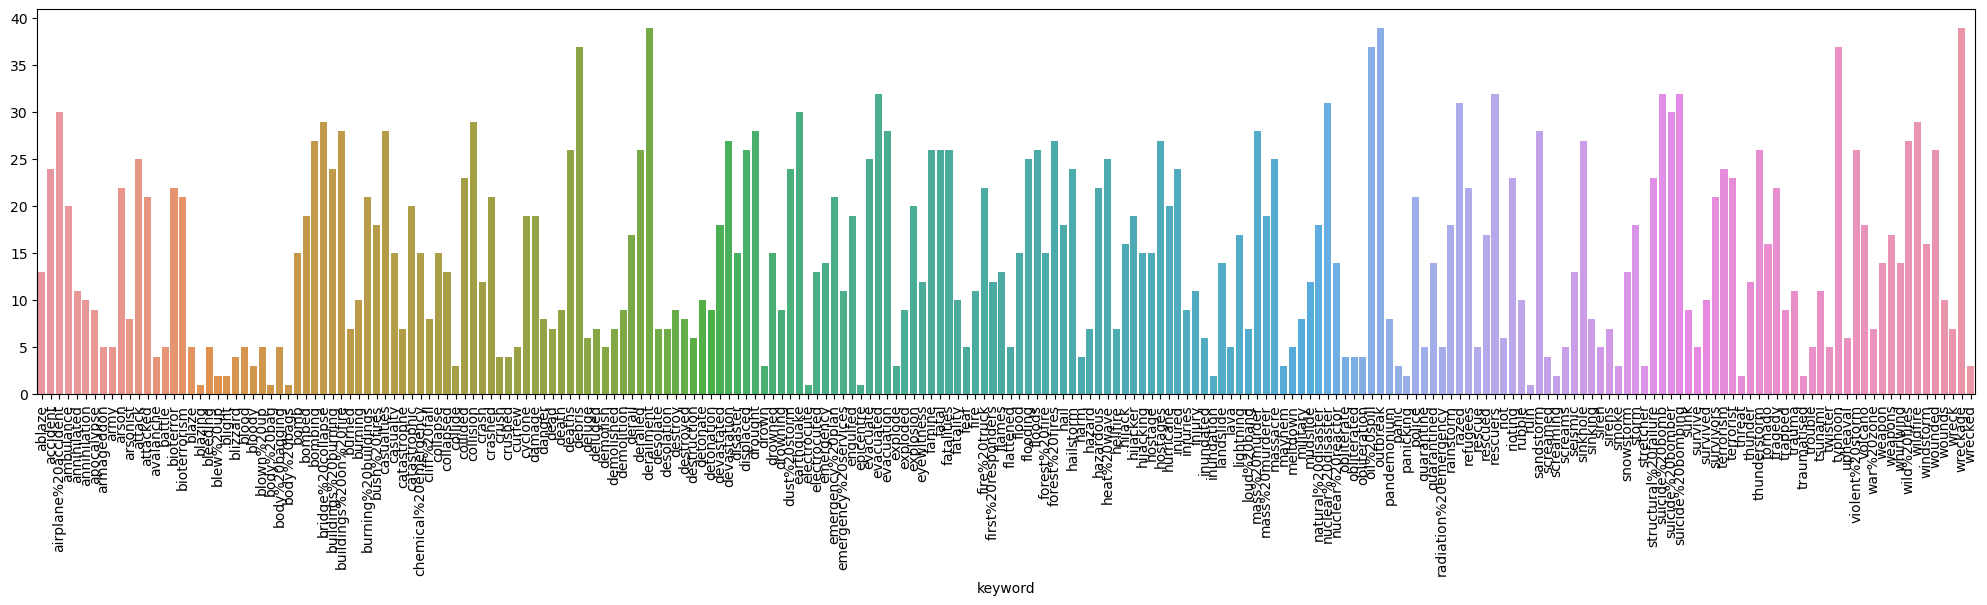

In [12]:
plt.subplots(figsize = (25,5))
sns.barplot(x=train[train['target'] == 1].groupby('keyword').size().index, y=train[train['target'] == 1].groupby('keyword').size().values)
plt.xticks(rotation=90)
plt.show()

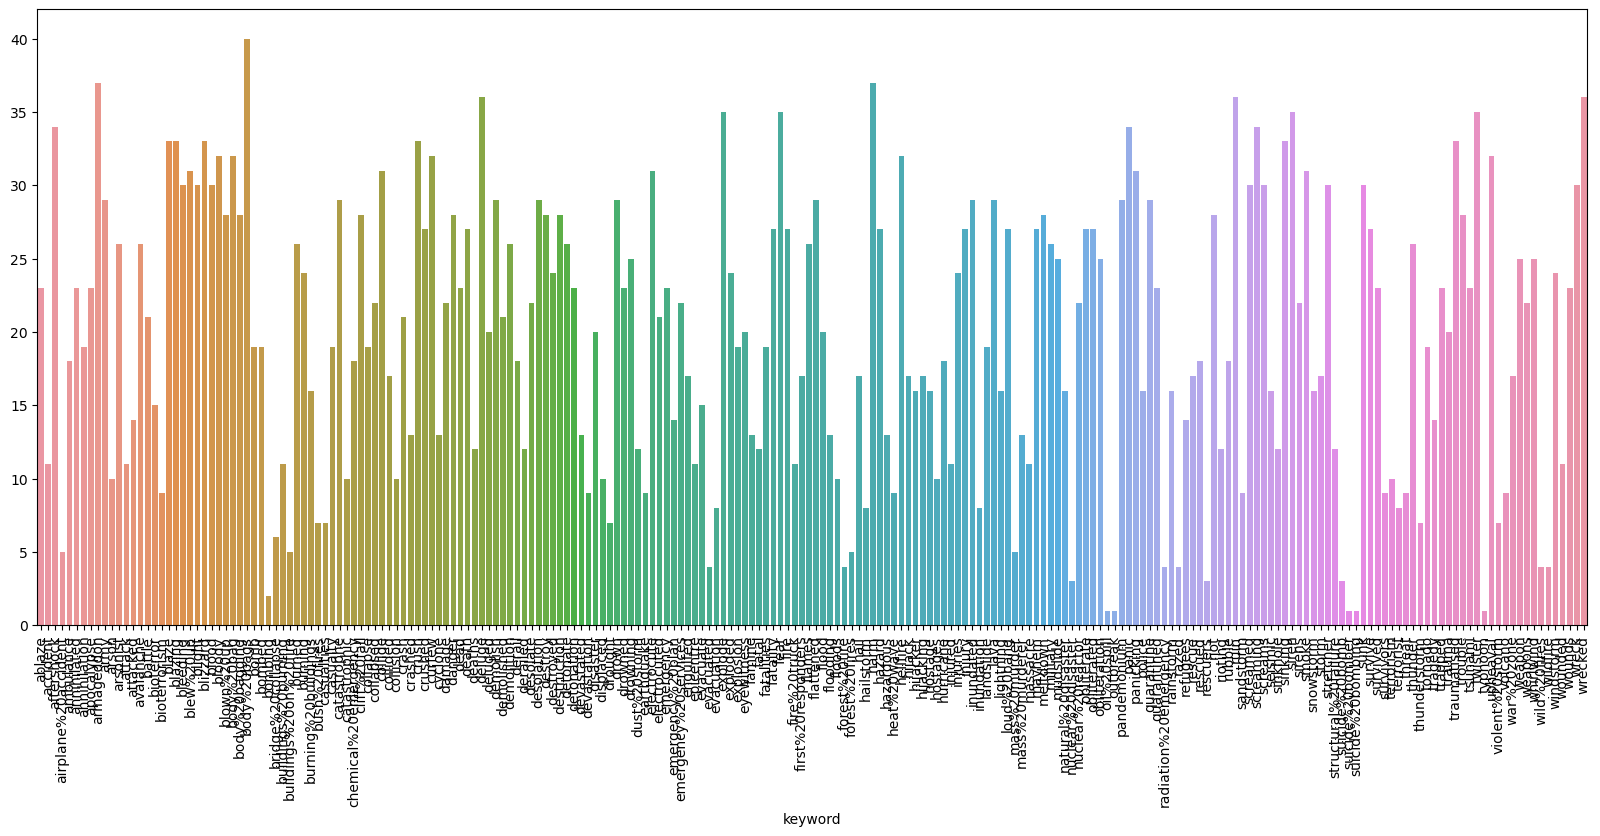

In [13]:
plt.subplots(figsize = (20,8))
sns.barplot(x=train[train['target'] == 0].groupby('keyword').size().index, y=train[train['target'] == 0].groupby('keyword').size().values)
plt.xticks(rotation=90)
plt.show()

In [14]:
key_dic = pd.DataFrame(sorted(train[train['target'] == 1].groupby('keyword').size().items(), key = lambda item:item[1], reverse = True))
key_dic.head(10)

,0,1
0,derailment,39
1,outbreak,39
2,wreckage,39
3,debris,37
4,oil%20spill,37
5,typhoon,37
6,evacuated,32
7,rescuers,32
8,suicide%20bomb,32
9,suicide%20bombing,32


In [15]:
key_dic = pd.DataFrame(sorted(train[train['target'] == 0].groupby('keyword').size().items(), key = lambda item:item[1], reverse = True))
key_dic.head(10)

,0,1
0,body%20bags,40
1,armageddon,37
2,harm,37
3,deluge,36
4,ruin,36
5,wrecked,36
6,explode,35
7,fear,35
8,siren,35
9,twister,35


- 진짜 뉴스 : Wreckage(난파), Derailment(탈선), debris(), Outbreak(어떤 사건의 발생), Typhoon(태풍) => 명사형 단어
- 가짜 뉴스 : twisser, deluge, explode, ruin, armageddon, harm, wrecked => 형용사 동사형 단어   

In [16]:
def check_na(data):
    isnull_na = (data.isnull().sum() / len(data)) * 100
    data_na = isnull_na.drop(isnull_na[isnull_na == 0].index).sort_values(ascending = False)
    missing_data = pd.DataFrame({'Missing Ratio' : data_na,
                                'Data Type' : data.dtypes[data_na.index]})
    print('결측치 데이터 칼럼과 건수 : \n', missing_data)
    
check_na(train)
check_na(test)

결측치 데이터 칼럼과 건수 : 
           Missing Ratio Data Type
location      33.272035    object
keyword        0.801261    object
결측치 데이터 칼럼과 건수 : 
           Missing Ratio Data Type
location      33.864542    object
keyword        0.796813    object


In [17]:
train.shape, test.shape

((7613, 5), (3263, 4))

In [18]:
test_id = test['id']
for datas in [train, test]:
    datas = datas.drop(['id', 'keyword', 'location'], axis = 1, inplace = True)
    
train.shape, test.shape

((7613, 2), (3263, 1))

In [19]:
import string
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def data_cleansing(text, remove_stopwords = False):
    url = re.compile(r'https?://\S+|www\.\S|')
    cleaned_text = url.sub(r'', text)
    
    html = re.compile(r'<.*?<')
    cleaned_text = html.sub(r'', cleaned_text)
    
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001f680-\U0001F6FF"
                               u"\U0001F1E0-\U0001F1FF"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags = re.UNICODE)
    
    cleaned_text = emoji_pattern.sub(r'', cleaned_text)
    
    cleaned_text = re.sub("[^a-zA-Z]", " ", cleaned_text)
    
    table = str.maketrans('', '', string.punctuation)
    cleaned_text = cleaned_text.translate(table)
    
    cleaned_text = cleaned_text.lower().split()
    
    if remove_stopwords:
        stops = set(stopwords.words('english'))
        cleaned_text = [word for word in cleaned_text if not word in stops]
        clean_review = ' '.join(cleaned_text)
        
    else:
        clean_review = ' '.join(cleaned_text)
        
    return clean_review

clean_train_reviews = []
for datas in [train, test]:
    datas['cleaned_text'] = datas['text'].apply(lambda x: data_cleansing(x, remove_stopwords=True))

train.head(5)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,target,cleaned_text
0,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders cal...
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...


- 말뭉치(corpus)는 자연어 분석 작업을 위해 만든 샘플 문서 집합
- TF-IDF는 Term Frequency-Inverse Document Frequency의 약자
- TF-IDF는 단어의 빈도와 역 문서(문장) 빈도를 사용해 문서(문장) 내의 각 단어마다 가중치를 부여하는 것
- TF(Term Frequency)는 특정 단어가 하나의 데이터 안에서 등장하는 횟수를 말한다.
- DF(Document Frequency)는 문서의 빈도 값을 말하며, 특정 단어가 여러 문서에 얼마나 자주 등장하는지를 알려 주는 지표
- IDF는 DF 역수, 특정 단어가 다른 문서에 등장하지 않을수록 중요도가 커진다는 의미

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ['Can I have lunch with you?',
         'No, I cannot have it with you.',
         'Because, I need to study later']

tfidfv = TfidfVectorizer().fit(corpus)

print(np.round(tfidfv.transform(corpus).toarray(), 2))
print(tfidfv.vocabulary_)

[[0.   0.52 0.   0.39 0.   0.   0.52 0.   0.   0.   0.   0.39 0.39]
 [0.   0.   0.46 0.35 0.46 0.   0.   0.   0.46 0.   0.   0.35 0.35]
 [0.45 0.   0.   0.   0.   0.45 0.   0.45 0.   0.45 0.45 0.   0.  ]]
{'can': 1, 'have': 3, 'lunch': 6, 'with': 11, 'you': 12, 'no': 8, 'cannot': 2, 'it': 4, 'because': 0, 'need': 7, 'to': 10, 'study': 9, 'later': 5}


In [21]:
vectorizer = TfidfVectorizer(min_df = 0.0, analyzer='char', sublinear_tf=True, ngram_range=(1, 3), max_features=10000)

X = vectorizer.fit_transform(train['cleaned_text']).toarray()
y = train['target'].values

print(X.shape)
print(y.shape)

(7613, 9445)
(7613,)


In [22]:
X

array([[0.07814124, 0.05481869, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.09202829, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06324682, 0.03750688, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.06705625, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06411913, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07585564, 0.05043067, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [23]:
print(X.shape)
print(y.shape)

(7613, 9445)
(7613,)


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((5329, 9445), (2284, 9445), (5329,), (2284,))

In [25]:
from sklearn.linear_model import LogisticRegression

lgs = LogisticRegression(class_weight = 'balanced')

lgs.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [26]:
X_testset = vectorizer.transform(test['cleaned_text']).toarray()
print('The Shape of Test Dataset :', X_testset.shape)

y_test_pred = lgs.predict(X_testset)
print('The Predict Value :', y_test_pred)

y_test_pred = np.where(y_test_pred > 0.5, 1, 0)
print('The Predict Class', y_test_pred)

submission_file = pd.DataFrame({'id' : test_id, 'target' : y_test_pred})
print(submission_file.head())

submission_file.to_csv('./Tweet_submission.csv', index=False)

The Shape of Test Dataset : (3263, 9445)
The Predict Value : [1 0 1 ... 1 1 1]
The Predict Class [1 0 1 ... 1 1 1]
   id  target
0   0       1
1   2       0
2   3       1
3   9       1
4  11       1
